In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
!pip install seaborn
import seaborn as sns

In [2]:
sns.set()

In [3]:
df = pd.read_csv("data.csv")
print(df)

                                                headline  clickbait
0                                     Should I Get Bings          1
1          Which TV Female Friend Group Do You Belong In          1
2      The New "Star Wars: The Force Awakens" Trailer...          1
3      This Vine Of New York On "Celebrity Big Brothe...          1
4      A Couple Did A Stunning Photo Shoot With Their...          1
...                                                  ...        ...
31995  To Make Female Hearts Flutter in Iraq, Throw a...          0
31996  British Liberal Democrat Patsy Calton, 56, die...          0
31997  Drone smartphone app to help heart attack vict...          0
31998  Netanyahu Urges Pope Benedict, in Israel, to D...          0
31999  Computer Makers Prepare to Stake Bigger Claim ...          0

[32000 rows x 2 columns]


In [4]:
df.describe() # check some statistics 

,clickbait
count,32000.000000
mean,0.499969
std,0.500008
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
df["clickbait"].value_counts() 

0    16001
1    15999
Name: clickbait, dtype: int64

<AxesSubplot:xlabel='clickbait', ylabel='count'>

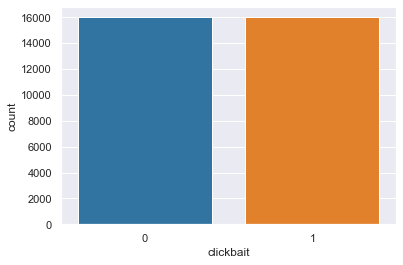

In [6]:
sns.countplot(x = 'clickbait',data = df, palette='tab10')

In [7]:
# two additional features which were used in combination with tfidf, the performance is improved using them 
df["token_len"] = [len(s.split()) for s in df["headline"]]    
df["start_with_number"] = [int((s[0].isdigit())) for s in df["headline"]]

In [8]:
df.sample(10)

,headline,clickbait,token_len,start_with_number
8142,Can You Identify These Famous Cartoon Characte...,1,11,0
1834,16 Scary Movies You Need To See Before You Die,1,10,1
19866,R. Allen Stanford Is Indicted and Turns Himsel...,0,9,0
1521,A Student Body President Was Sent Home From Sc...,1,13,0
22273,Australian Government passes new terror laws,0,6,0
407,This Woman Is Using Dead Fish As A Makeup Acce...,1,10,0
8020,15 Things You Just Might Have In Common With H...,1,11,1
22635,U.S. Supreme Court Justice David Souter to retire,0,8,0
14816,This Quiz Will Determine How Datable You Are,1,8,0
10309,"How Many ""Star Wars"" Starships Can You Identify",1,8,0


In [9]:
df.describe()

,clickbait,token_len,start_with_number
count,32000.000000,32000.000000,32000.000000
mean,0.499969,9.065156,0.198719
std,0.500008,2.603603,0.399042
min,0.000000,1.000000,0.000000
25%,0.000000,7.000000,0.000000
50%,0.000000,9.000000,0.000000
75%,1.000000,11.000000,0.000000
max,1.000000,26.000000,1.000000


In [10]:
df["start_with_number"].value_counts()

0    25641
1     6359
Name: start_with_number, dtype: int64

<AxesSubplot:xlabel='start_with_number', ylabel='count'>

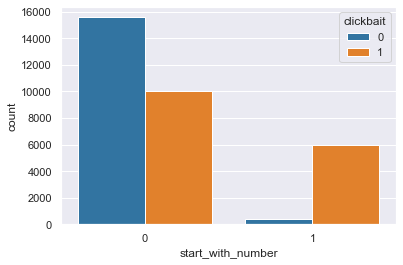

In [11]:
# the sentences that start with a number are more probably to be clickbait
sns.countplot(data = df ,x='start_with_number', hue='clickbait', palette='tab10')

<AxesSubplot:xlabel='start_with_number', ylabel='count'>

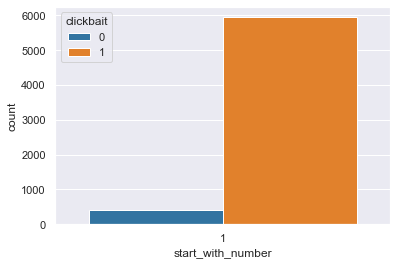

In [12]:
sns.countplot(data = df ,x='start_with_number', hue='clickbait', palette='tab10',
              order=df.start_with_number.value_counts().iloc[1:].index)

<AxesSubplot:xlabel='token_len', ylabel='count'>

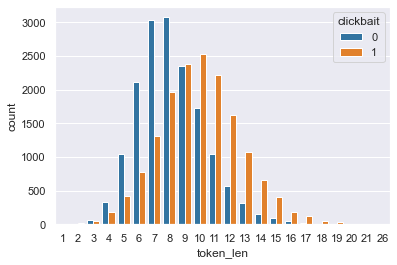

In [13]:
sns.countplot(data = df ,x='token_len',hue='clickbait', palette='tab10')

In [14]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()
stop_words_nltk = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PesikaMau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def preprocess(news):
    news = re.sub('\n', '', news)
    news = news.lower()
    news = re.sub(r'[^\w\s]',' ', news)
#     news = re.sub(r'\d+', '', news) 
    news = nltk.word_tokenize(news)
    news = [i for i in news if not i in stop_words_nltk]
    return news

In [16]:
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
import nltk

from matplotlib.figure import Figure
import matplotlib.pyplot as plt

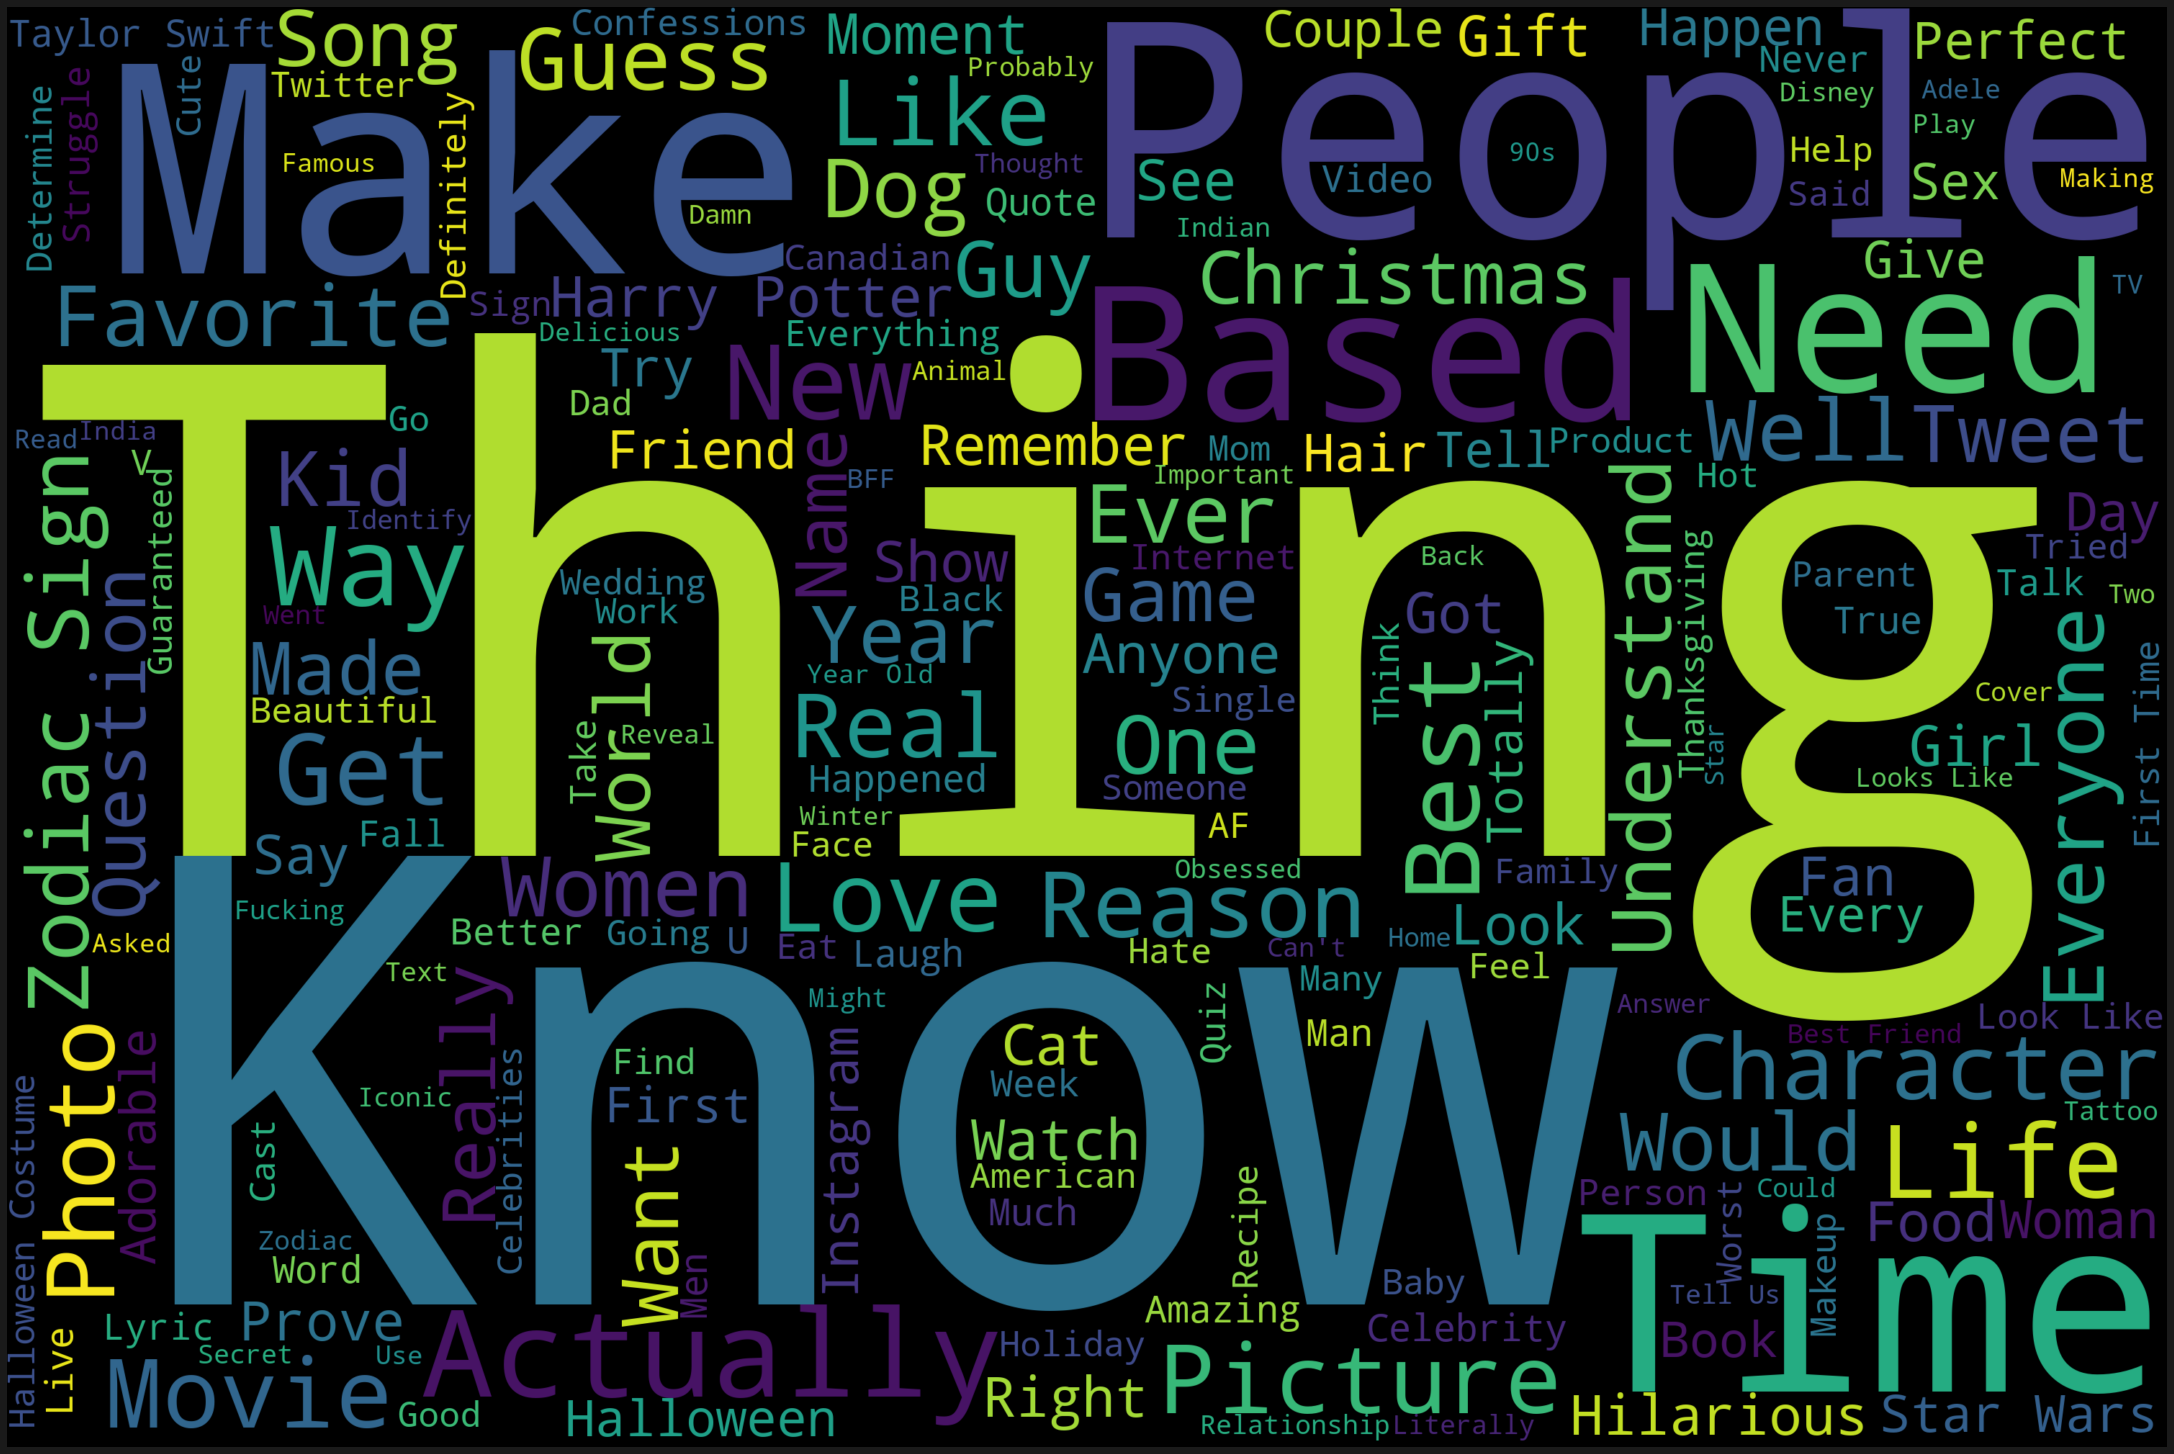

In [17]:
#Word Cloud clickbait data
text = ''
for news in df[df.clickbait == 1].headline:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

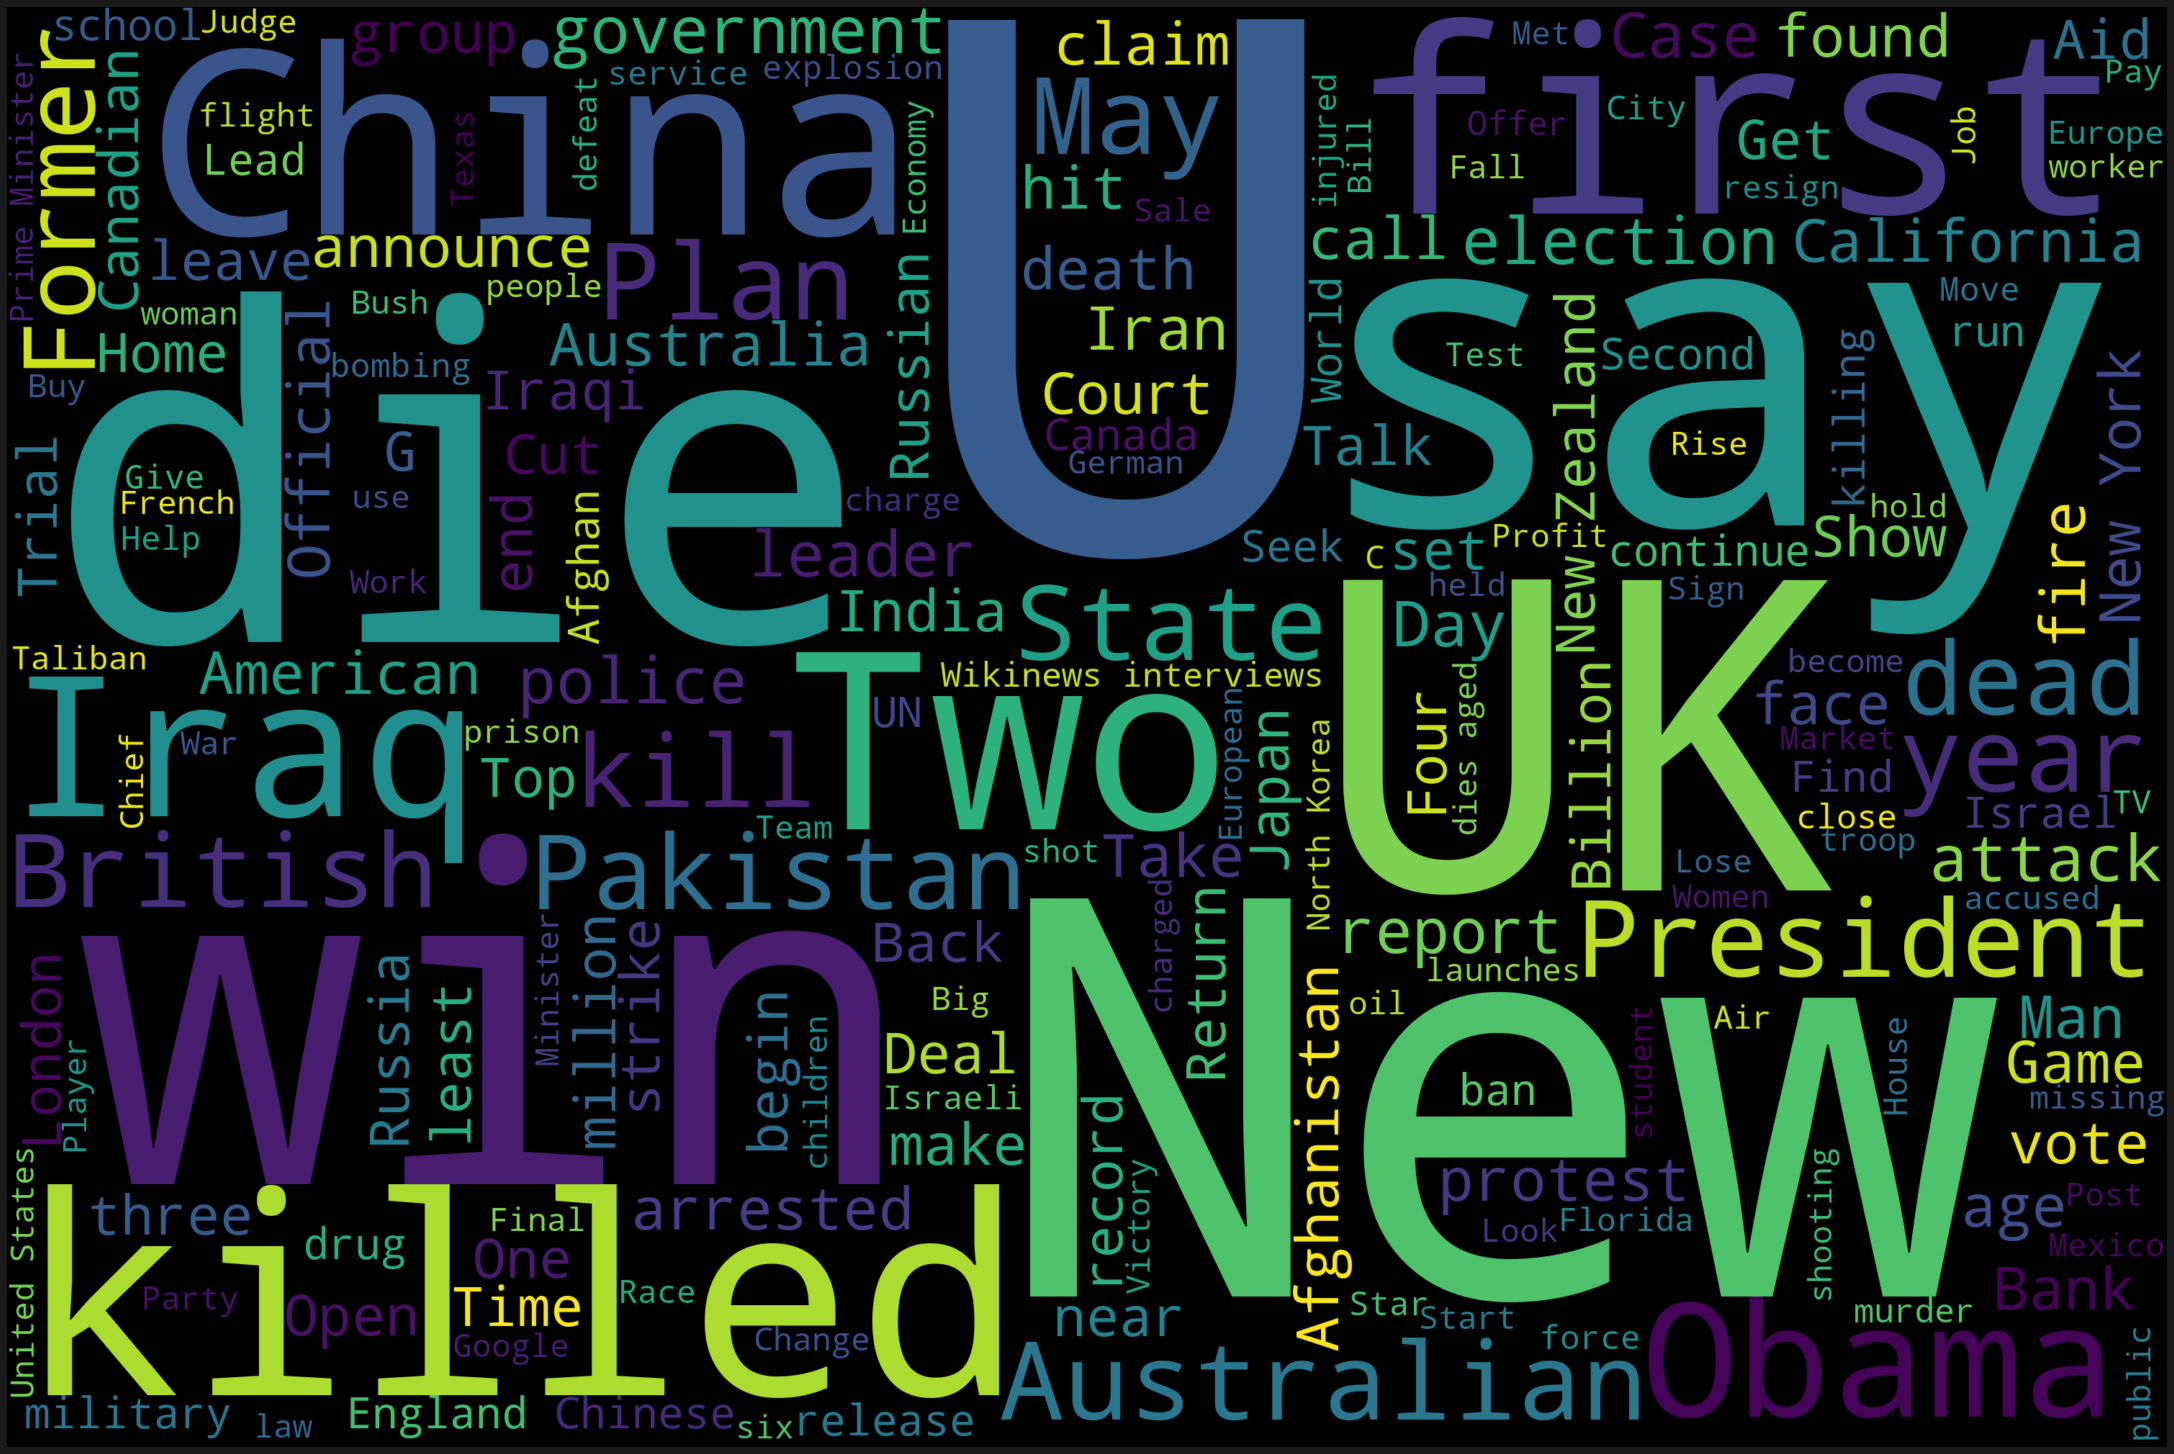

In [18]:
#Word Cloud non clickbait data
text = ''
for news in df[df.clickbait == 0].headline:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

In [19]:
#the classification was improved without using preprocessing
# df['headline'] = df['headline'].apply(preprocess)

In [20]:
df

,headline,clickbait,token_len,start_with_number
0,Should I Get Bings,1,4,0
1,Which TV Female Friend Group Do You Belong In,1,9,0
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,14,0
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,12,0
4,A Couple Did A Stunning Photo Shoot With Their...,1,18,0
...,...,...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0,10,0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0,9,0
31997,Drone smartphone app to help heart attack vict...,0,12,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0,9,0


In [21]:
#checking for duplicates
duplicates = df.duplicated().sum()
print('No. of duplicate records :',duplicates)

No. of duplicate records : 0


In [22]:
features = df.drop(columns='clickbait')
y = df['clickbait']

In [23]:
random_state = 100
np.random.seed(random_state)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, shuffle=True, random_state = random_state)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25600, 3)
(25600,)
(6400, 3)
(6400,)


# First part - supervised/ unsupervised using TFIDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 100)

tfidf_text_train = tfidf.fit_transform(X_train['headline'])
tfidf_text_test = tfidf.transform(X_test['headline'])

X_train_ef = X_train.drop(columns='headline')
X_test_ef = X_test.drop(columns='headline')

In [26]:
from scipy import sparse
# combine tfidf with the features "start_with_num" and "token_len"
X_train = sparse.hstack([X_train_ef, tfidf_text_train]).tocsr()
X_test = sparse.hstack([X_test_ef, tfidf_text_test]).tocsr()

In [27]:
print(type(X_train))
print(type(X_test))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>


In [28]:
print(X_train.shape)
print(X_test.shape)

(25600, 102)
(6400, 102)


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, classification_report

## Supervised Learning

### Logistic Regression

In [30]:
#parameter tuning
model_le=LogisticRegression(max_iter= 10000, random_state=random_state)
model_le.fit(X_train,y_train)
parameters = {'C':[0.8,0.9,1,1.1,1.2]}
model_le_grid = GridSearchCV(model_le, parameters,cv=10,verbose=1,n_jobs=-1).fit(X_train,y_train)
print(model_le_grid.best_params_)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'C': 1.2}


In [31]:
logreg = LogisticRegression(max_iter= 10000, random_state=random_state, C=1.2)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.2, max_iter=10000, random_state=100)

In [32]:
y_pred = logreg.predict(X_test)

In [33]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3247
           1       0.94      0.92      0.93      3153

    accuracy                           0.93      6400
   macro avg       0.93      0.93      0.93      6400
weighted avg       0.93      0.93      0.93      6400



In [34]:
print('Train Score', logreg.score(X_train, y_train))
print('Test Score', logreg.score(X_test, y_test))

Train Score 0.9255859375
Test Score 0.928125


In [35]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[3050,  197],
       [ 263, 2890]], dtype=int64)

### SVC

In [36]:
# #parameter tuning
# model_svc=SVC(random_state=random_state)
# parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.8,0.9,1,1.1,1.2],'degree':[3,4,5,6]}
# model_svc_grid = GridSearchCV(model_svc, parameters,cv=10,verbose=1,n_jobs=-1).fit(X_train,y_train)
# print(model_svc_grid.best_params_)


# print('Support Vecktor Classification score:',model_svc_grid.best_score_)

In [37]:
svc = SVC(random_state=random_state,C=1.2,degree=3,kernel='rbf')
svc.fit(X_train, y_train)
print('Train Score', svc.score(X_train, y_train))
print('Test Score', svc.score(X_test, y_test))

Train Score 0.91921875
Test Score 0.92203125


In [38]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3247
           1       0.94      0.92      0.93      3153

    accuracy                           0.93      6400
   macro avg       0.93      0.93      0.93      6400
weighted avg       0.93      0.93      0.93      6400



In [39]:
y_pred = svc.predict(X_test)

In [40]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[3060,  187],
       [ 312, 2841]], dtype=int64)

In [41]:
def train_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,zero_division=0)
    
    return accuracy,precision

In [42]:
# see which model has a better accuracy (compare accuracy and precision)
models = { 
    'LogisticRegression': logreg, 
    'SupportVectorClassifier': svc

}

accuracy_scores = []
precision_scores = []

for name,model in models.items():
    
    current_accuracy,current_precision = train_model(model, X_train,y_train,X_test,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

performance_df = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,LogisticRegression,0.928125,0.936184
1,SupportVectorClassifier,0.922031,0.938243


## Unsupervised Learning

### KMEANS

In [43]:
from sklearn.cluster import KMeans


In [44]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [45]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1, random_state=random_state)
model.fit(X_train)
predicted_labels = model.predict(X_train)

In [46]:
#translate the cluster labels into class labels. Print the accuracy
confusion_matrix_kmeans = np.zeros((2,2))
for train_label, predicted_label in zip(y_train, predicted_labels):
    confusion_matrix_kmeans[train_label][predicted_label] += 1
    
from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(1. / confusion_matrix_kmeans)

translate = dict(zip(col_ind, row_ind))
predicted_labels = np.array([
    translate[label]
    for label in predicted_labels
])

test_predictions = np.array([
    translate[label]
    for label in model.predict(X_test)
])

print("Train score: ",np.mean(predicted_labels == y_train))
print("Test score:", np.mean(test_predictions == y_test))

Train score:  0.6543359375
Test score: 0.6515625


In [47]:
#use np arrays for cluster plots
X_train_blobs = X_train.toarray()
y_train_blobs = y_train

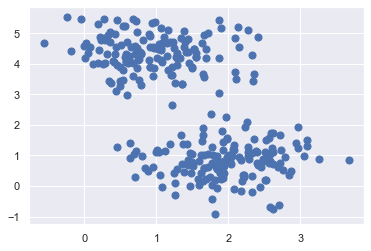

In [48]:
# see how original data looks like
from sklearn.datasets import make_blobs
X_train_blobs, y_train_blobs = make_blobs(n_samples=300, centers=2,
                       cluster_std=0.60, random_state=0)
plt.scatter(X_train_blobs[:, 0], X_train_blobs[:, 1], s=50);

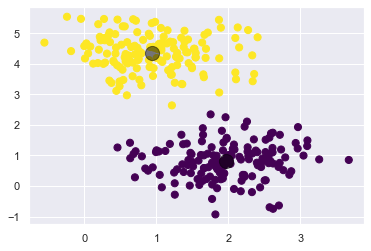

In [49]:
# clusters plotting
y_kmeans = model.fit_predict(X_train_blobs)
plt.scatter(X_train_blobs[:, 0], X_train_blobs[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### Hierarchical Clustering

In [50]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters = 2, linkage = 'complete')
predicted_labels_hier = hierarchical.fit_predict(X_train.toarray())

In [51]:
#translate the cluster labels into class labels. Print the accuracy
confusion_matrix_hier = np.zeros((2,2))
for train_label, predicted_label in zip(y_train, predicted_labels_hier):
    confusion_matrix_hier[train_label][predicted_label] += 1
    
for col in range(2):
    confusion_matrix_hier[:, col] /= np.sum(confusion_matrix_hier[:, col])
    
row_ind, col_ind = linear_sum_assignment(- confusion_matrix_hier)

translate = dict(zip(col_ind, row_ind))
predicted_labels_hier = np.array([
    translate[label]
    for label in predicted_labels_hier
])

test_predictions = np.array([
    translate[label]
    for label in hierarchical.fit_predict(X_test.toarray())
])

print("Train score: ",np.mean(predicted_labels_hier == y_train))
print("Test score:",np.mean(test_predictions == y_test))

Train score:  0.5890625
Test score: 0.52578125


## Supervised and Unsupervised using Word2Vec

In [52]:
!pip install gensim
from gensim.models import Word2Vec
import gensim.downloader

In [53]:
word2vec = gensim.downloader.load('word2vec-google-news-300')

In [54]:
print(df)

                                                headline  clickbait  \
0                                     Should I Get Bings          1   
1          Which TV Female Friend Group Do You Belong In          1   
2      The New "Star Wars: The Force Awakens" Trailer...          1   
3      This Vine Of New York On "Celebrity Big Brothe...          1   
4      A Couple Did A Stunning Photo Shoot With Their...          1   
...                                                  ...        ...   
31995  To Make Female Hearts Flutter in Iraq, Throw a...          0   
31996  British Liberal Democrat Patsy Calton, 56, die...          0   
31997  Drone smartphone app to help heart attack vict...          0   
31998  Netanyahu Urges Pope Benedict, in Israel, to D...          0   
31999  Computer Makers Prepare to Stake Bigger Claim ...          0   

       token_len  start_with_number  
0              4                  0  
1              9                  0  
2             14                 

In [55]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, shuffle = True, random_state=random_state)
print(train_df)
print(test_df)

                                                headline  clickbait  \
21440  At least 15 die after boat sinks in Macedonian...          0   
22897  2007/08 Bundesliga: Bayern Munich vs. Hertha B...          0   
19396  Lula's future in the hands of Brazilian Parlia...          0   
1966             Where In Wales Should You Actually Live          1   
7742   Rebel Wilson And Dakota Johnson Answer Your Da...          1   
...                                                  ...        ...   
12119  When You Binge-Watch "Making A Murderer" And T...          1   
24423  Schiphol airliner crash blamed on altimeter fa...          0   
14147  Radiohead Release Rejected Bond Theme Song And...          1   
23320       Chernobyl Taking a Toll on Invertebrates Too          0   
5640   8 Things No One Tells Guys With Body Image Anx...          1   

       token_len  start_with_number  
21440         10                  0  
22897          8                  1  
19396          8                 

In [56]:
import tqdm

# compute the embeddings, 300 features
def compute_embeddings(df):
    train_emb = []
    for i, row in tqdm.tqdm(df.iterrows(), total = len(df.index)):
        words = row['headline'].split(' ')
        words = filter(lambda x: x in word2vec.key_to_index, words)
        text_emb = [word2vec[word] for word in words]
        
        if len(text_emb) == 0:
            train_emb.append(np.zeros(300))
            continue

        doc_embedding = np.mean(text_emb, axis = 0)
        train_emb.append(doc_embedding)
    return np.array(train_emb)

In [57]:
X_train_emb = compute_embeddings(train_df)
y_train = train_df['clickbait']

X_test_emb = compute_embeddings(test_df)
y_test = test_df['clickbait']

100%|██████████| 6400/6400 [00:00<00:00, 22805.07it/s]


In [58]:
X_test_emb=X_test_emb.astype("float64")
X_train_emb=X_train_emb.astype("float64")

In [59]:
print(X_train_emb.shape)
print(y_train.shape)
print(X_test_emb.shape)
print(y_test.shape)

(25600, 300)
(25600,)
(6400, 300)
(6400,)


## Supervised Learning

### Logistic Regression

In [60]:
#parameter tuning
# model_le=LogisticRegression(max_iter= 10000, random_state=random_state)
# model_le.fit(X_train_emb,y_train)
# parameters = {'C':[0.8,0.9,1,1.1,1.2]}
# model_le_grid = GridSearchCV(model_le, parameters,cv=10,verbose=1,n_jobs=-1).fit(X_train_emb,y_train)
# print(model_le_grid.best_params_)


In [61]:
logreg = LogisticRegression(max_iter= 10000, random_state=random_state, C=1.2)
logreg.fit(X_train_emb, y_train)

LogisticRegression(C=1.2, max_iter=10000, random_state=100)

In [62]:
y_pred = logreg.predict(X_test_emb)

In [63]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3247
           1       0.97      0.99      0.98      3153

    accuracy                           0.98      6400
   macro avg       0.98      0.98      0.98      6400
weighted avg       0.98      0.98      0.98      6400



In [64]:
print('Train Score', logreg.score(X_train_emb, y_train))
print('Test Score', logreg.score(X_test_emb, y_test))

Train Score 0.9850390625
Test Score 0.9815625


In [65]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[3159,   88],
       [  30, 3123]], dtype=int64)

### SVM

In [66]:
#parameter tuning
# model_svc=SVC(random_state=random_state)
# parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.8,0.9,1,1.1,1.2],'degree':[3,4,5,6]}
# model_svc_grid = GridSearchCV(model_svc, parameters,cv=10,verbose=1,n_jobs=-1).fit(X_train_emb,y_train)
# print(model_svc_grid.best_params_)


# print('Support Vecktor Classification score:',model_svc_grid.best_score_)

In [67]:
svc = SVC(random_state=random_state,C=1.2,degree=3,kernel='poly')
svc.fit(X_train_emb, y_train)
print('Train Score', svc.score(X_train_emb, y_train))
print('Test Score', svc.score(X_test_emb, y_test))

Train Score 0.9971484375
Test Score 0.9875


In [68]:
y_pred = svc.predict(X_test_emb)

In [69]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[3188,   59],
       [  21, 3132]], dtype=int64)

In [70]:
# see which model has a better accuracy (compare accuracy and precision)
models = { 
    'LogisticRegression': logreg, 
    'SupportVectorClassifier': svc,

}

accuracy_scores = []
precision_scores = []

for name,model in models.items():
    
    current_accuracy,current_precision = train_model(model, X_train_emb,y_train,X_test_emb,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

performance_df = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,SupportVectorClassifier,0.987500,0.981510
0,LogisticRegression,0.981563,0.972594


## Unsupervised Learning

### KMEANS

In [71]:
type(X_train_emb)

numpy.ndarray

In [72]:
print(X_train_emb.shape)
print(y_train.shape)

(25600, 300)
(25600,)


In [73]:
model = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=1, random_state=random_state)
model.fit(X_train_emb)
predicted_labels = model.predict(X_train_emb)

In [74]:
#translate the cluster labels into class labels. Print the accuracy
confusion_matrix_kmeans_w2v = np.zeros((2,2))
for train_label, predicted_label in zip(y_train, predicted_labels):
    confusion_matrix_kmeans_w2v[train_label][predicted_label] += 1
    
from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(1. / confusion_matrix_kmeans_w2v)

translate = dict(zip(col_ind, row_ind))
predicted_labels = np.array([
    translate[label]
    for label in predicted_labels
])

test_predictions = np.array([
    translate[label]
    for label in model.predict(X_test_emb)
])

print("Train score:", np.mean(predicted_labels == y_train))
print("Test score: ", np.mean(test_predictions == y_test))

Train score: 0.8457421875
Test score:  0.8478125


In [75]:
X_train_blobs = X_train_emb
y_train_blobs = y_train

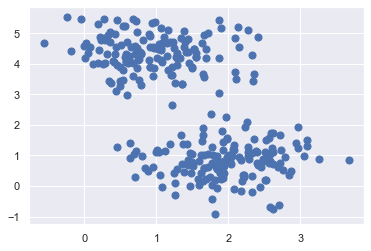

In [76]:
from sklearn.datasets import make_blobs
X_train_blobs, y_train_blobs = make_blobs(n_samples=300, centers=2,
                       cluster_std=0.60, random_state=0)
plt.scatter(X_train_blobs[:, 0], X_train_blobs[:, 1], s=50);

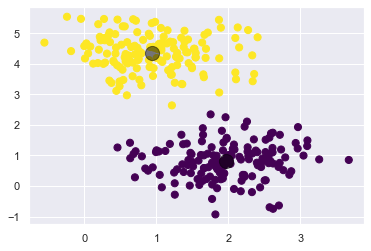

In [77]:
y_kmeans = model.fit_predict(X_train_blobs)
plt.scatter(X_train_blobs[:, 0], X_train_blobs[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### Hierarchical Clustering

In [78]:
hierarchical = AgglomerativeClustering(n_clusters = 2, linkage = 'complete')
predicted_labels_hier = hierarchical.fit_predict(X_train_emb)

In [79]:
print(X_train_emb.shape)
print(y_train.shape)

(25600, 300)
(25600,)


In [80]:
predicted_labels_hier.shape

(25600,)

In [81]:
y_train.shape

(25600,)

In [82]:
#translate the cluster labels into class labels. Print the accuracy
confusion_matrix_hier_w2v = np.zeros((2,2))
for train_label, predicted_label in zip(y_train, predicted_labels_hier):
    confusion_matrix_hier_w2v[train_label][predicted_label] += 1
    
for col in range(2):
    confusion_matrix_hier_w2v[:, col] /= np.sum(confusion_matrix_hier_w2v[:, col])
    
row_ind, col_ind = linear_sum_assignment(- confusion_matrix_hier_w2v)

translate = dict(zip(col_ind, row_ind))
predicted_labels_hier = np.array([
    translate[label]
    for label in predicted_labels_hier
])

test_predictions = np.array([
    translate[label]
    for label in hierarchical.fit_predict(X_test_emb)
])

print("Train score:", np.mean(predicted_labels_hier == y_train))
print("Test score: ", np.mean(test_predictions == y_test))

Train score: 0.5018359375
Test score:  0.4925
